___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:

df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

In [8]:
df.drop(columns='CustomerID', inplace=True)

In [9]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


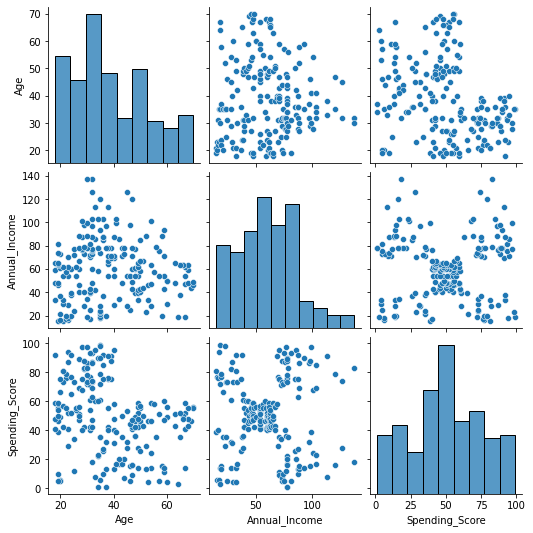

In [10]:
sns.pairplot(df)
plt.show()

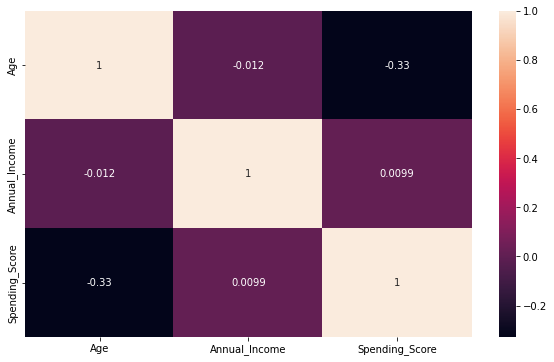

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

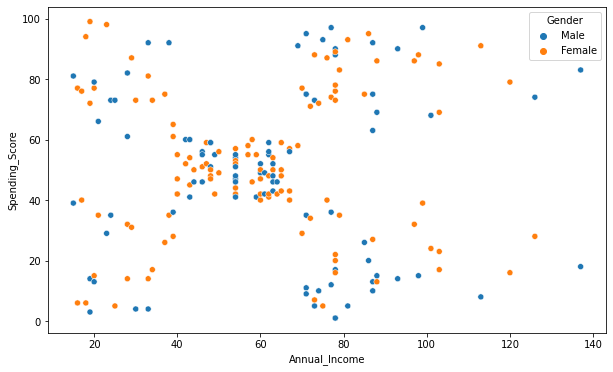

In [12]:
sns.scatterplot(x ='Annual_Income', y='Spending_Score', data=df, hue = "Gender")
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [13]:
df2 = df.drop(columns='Gender')

In [14]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from pyclustertend import hopkins

In [16]:
hopkins(df2, df2.shape[0])

0.3077913162239973

In [17]:
X = df.loc[:,['Age','Spending_Score']]
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [18]:
hopkins(X, X.shape[0])

0.2987109177589027

#### *ii. Determine optimal number of clusters*

In [19]:
from sklearn.cluster import KMeans

In [20]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

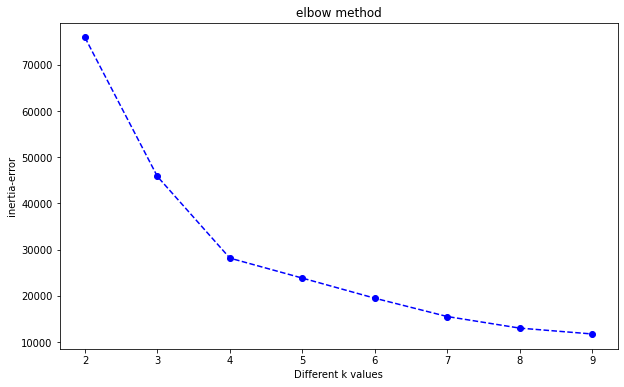

In [21]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [22]:
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

In [23]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
dtype: float64

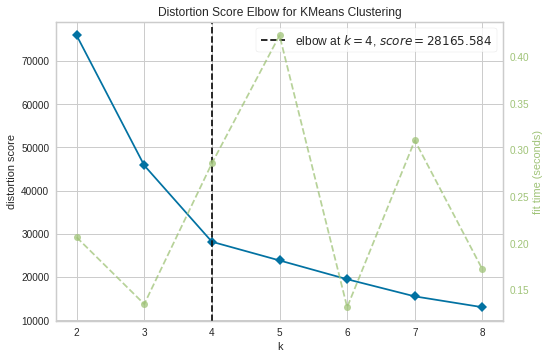

In [24]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


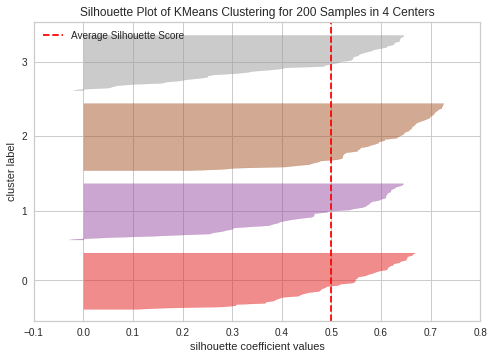

In [27]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    
visualizer.poof();

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [28]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [29]:
model.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [30]:
clusters = model.labels_

In [31]:
X["predicted_clusters"] = clusters

In [32]:
X

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

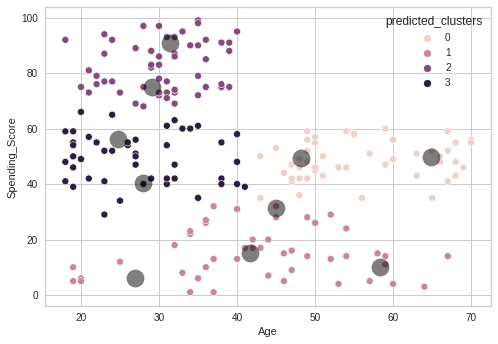

In [33]:
sns.scatterplot(x='Age', y='Spending_Score', hue='predicted_clusters', data=X)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [34]:
X1 = df.loc[:,['Annual_Income','Spending_Score']]
X1.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [35]:
hopkins(X1, X1.shape[0]) 

0.2958638672357587

#### *ii. Determine optimal number of clusters*

In [36]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

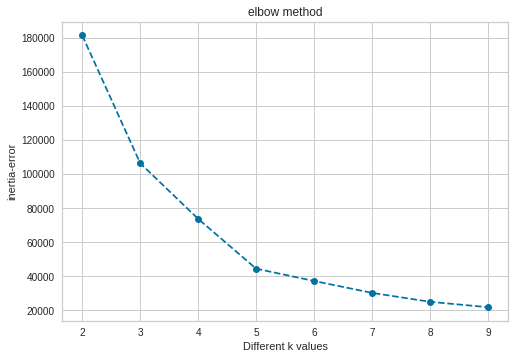

In [37]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [38]:
ssd

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636]

In [39]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3161.674067
dtype: float64

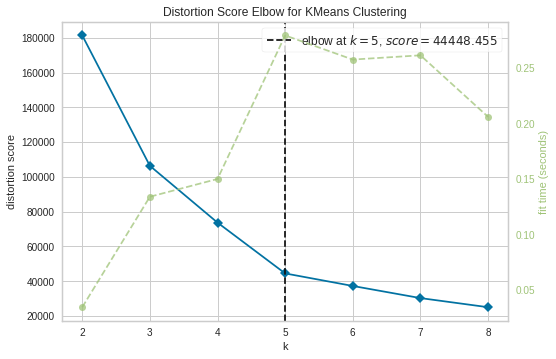

In [40]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

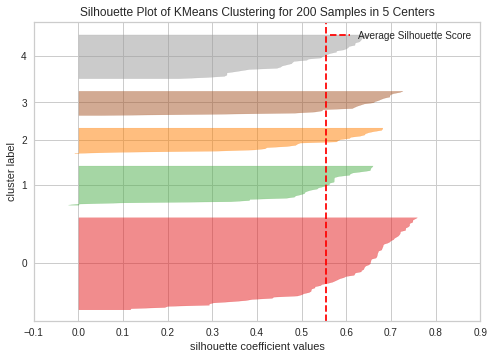

In [41]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

In [42]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


#### *iii. Apply K Means*

In [43]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [44]:
X1['cluster_Kmeans'] = kmeans2.fit_predict(X1) 
X1

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


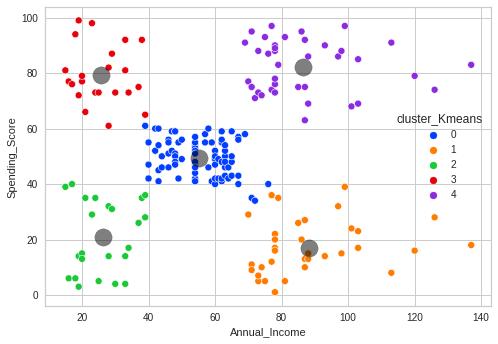

In [45]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [47]:
hc_ward = linkage(y = X, method = "ward")   
hc_complete = linkage(X, "complete")        
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")           

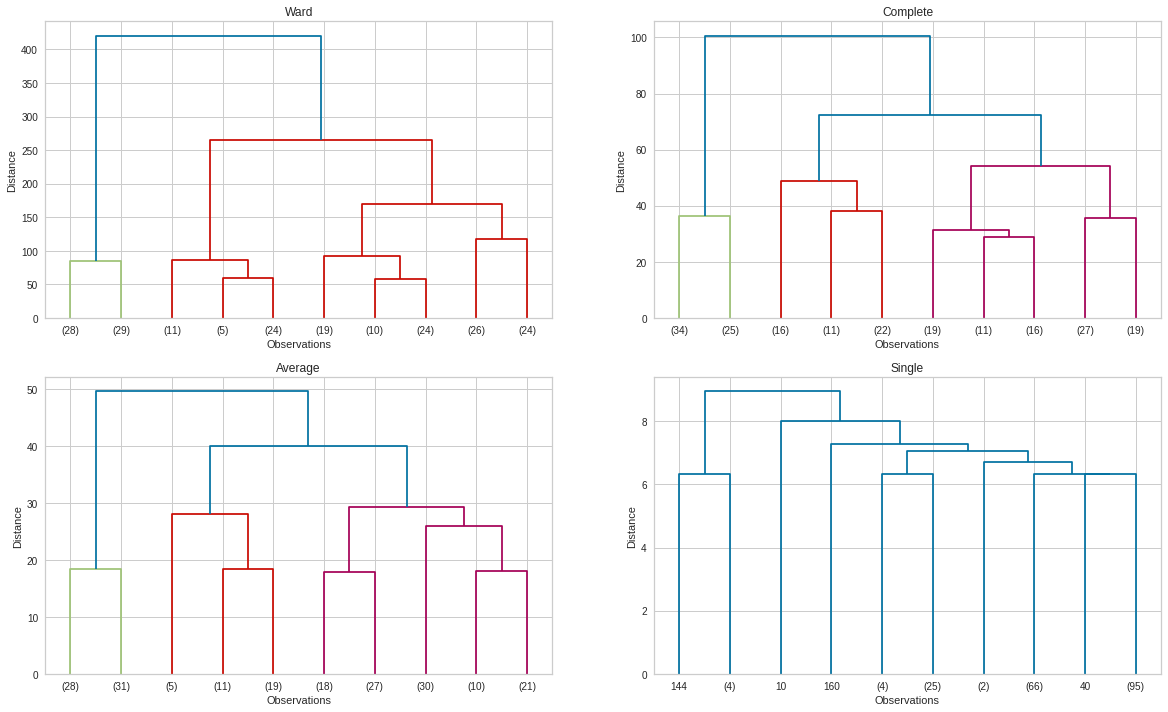

In [48]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [50]:

  
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=num_clusters)
    model.fit(X)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


## Clustering based on Annual Income and Spending Score- x1

In [51]:
hc_ward = linkage(y = X1, method = "ward")   
hc_complete = linkage(X1, "complete")        
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")   

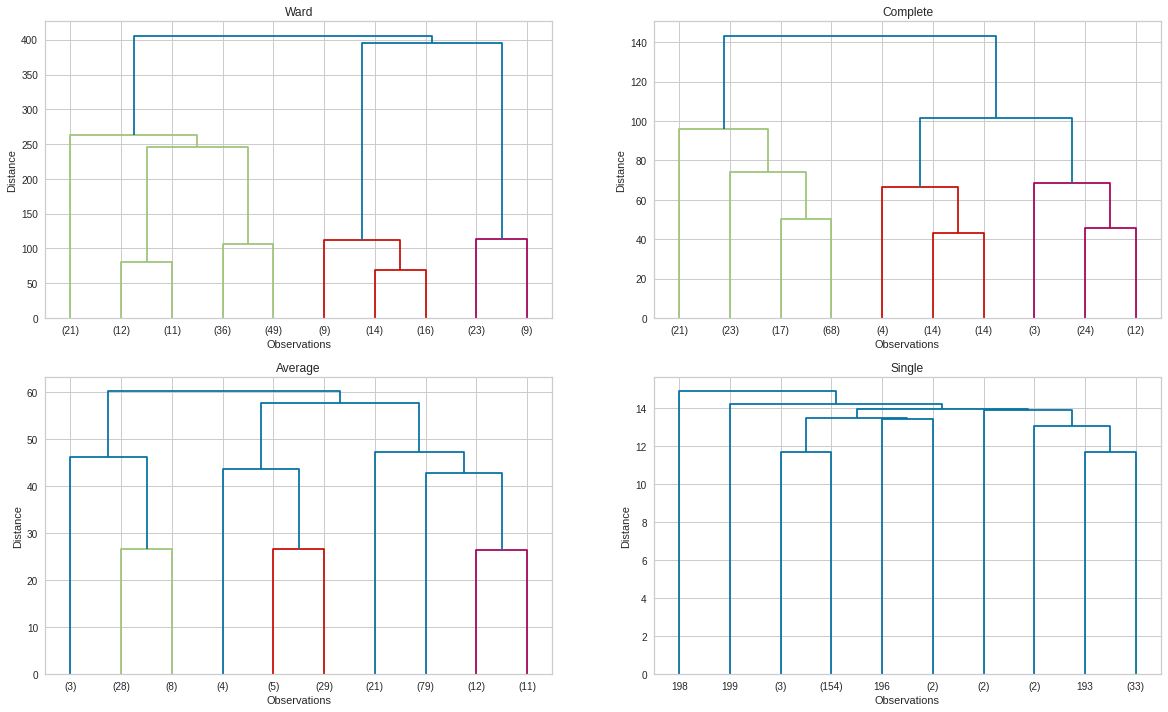

In [52]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [53]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=num_clusters)
    model.fit(X1)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x

In [55]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

In [56]:
X['cluster_Agg'] = y_agg
X.head()

,Age,Spending_Score,predicted_clusters,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,0
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x1


In [57]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X1)

In [59]:
X1['cluster_Agg'] = y_agg2
X1.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

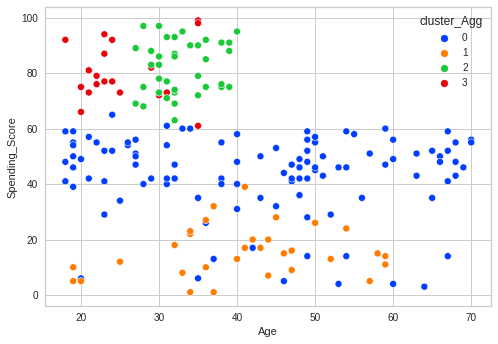

In [61]:
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X, palette="bright")

#### Annual Income and Spending Score- x2

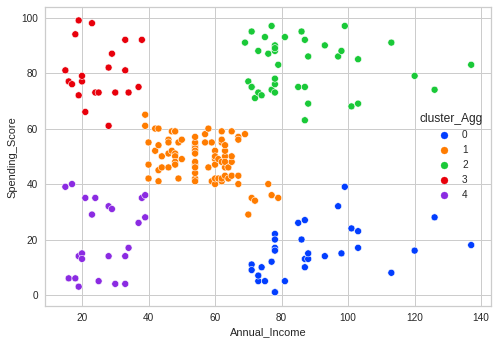

In [62]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=X1 ,palette="bright")

#### Interpretation based on Age and Spending Score- x1

In [71]:
X.head()

,Age,Spending_Score,predicted_clusters,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,0
3,23,77,2,3
4,31,40,3,0


In [72]:
X.predicted_clusters.value_counts()

2    57
1    48
0    48
3    47
Name: predicted_clusters, dtype: int64

In [73]:
X1.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [74]:
X1.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___